What I have learned from this Analysis:

    1. The weather starts to change, becoming warmer as we get closser to the equator. 
    2. Looking at the trend for cloudiness and latittude, it seems like there are no correlation between those two. 
    3. I'm not sure if it si my data, my I realize that there are more city located in north in my sample of data than in any other places. With that in mind the wind is a lot more stronger than any other part of the data set gathered. 


In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
#open weather api = 7532ab6368ec9c3472b338f10d38fc27


In [60]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [61]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

#Perform API Calls

In [62]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key 
city_data = []
count = 0
set_count = 1
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

for city in cities:
    city_url = url + "&q=" + city
    if count <=50:
        count= count+1
    elif count >50:
            set_count = set_count + 1
            count = 0
    print("processing record " + str( count) + "of set" + str(set_count) + "|" + city )
    print(city_url)
    try:
        city_weather = requests.get(city_url).json()
        city_latitude = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_cloudiness = city_weather['clouds']['all']
        city_windspeed = city_weather['wind']['speed']
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_data.append({"city":city,
                      "Latitude":city_latitude,
                          "Lng": city_longitude,
                      "Max Temp":city_max_temp,
                      "Humidity":city_humidity,
                      "Cloudiness":city_cloudiness,
                      "Wind Speed":city_windspeed,
                         "Country": city_country,
                            "Date": city_date
                      })
    except:
        print("city not found")
        pass

# Indicate that Data Loading is complete 
print("Data Retrieval Complete  ")

Beginning Data Retrieval     
-----------------------------
processing record 1of set1|adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7532ab6368ec9c3472b338f10d38fc27&q=adrar
processing record 2of set1|waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7532ab6368ec9c3472b338f10d38fc27&q=waipawa
processing record 3of set1|szprotawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7532ab6368ec9c3472b338f10d38fc27&q=szprotawa
processing record 4of set1|bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7532ab6368ec9c3472b338f10d38fc27&q=bluff
processing record 5of set1|uribia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7532ab6368ec9c3472b338f10d38fc27&q=uribia
processing record 6of set1|georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7532ab6368ec9c3472b338f10d38fc27&q=georgetown
processing record 7of set1|mataura
http://api.openweathermap.org

In [63]:
#creating the data frame to hold the information

city_info_df = pd.DataFrame(city_data)
city_info_df.count()


Cloudiness    537
Country       537
Date          537
Humidity      537
Latitude      537
Lng           537
Max Temp      537
Wind Speed    537
city          537
dtype: int64

Plotting the Data

In [64]:
# creating the data frame to hold the new table
latitude = city_info_df["Latitude"]
max_temperature = city_info_df["Max Temp"]
humidity = city_info_df["Humidity"]
cloudiness = city_info_df["Cloudiness"]
wind_speed = city_info_df["Wind Speed"]
country= city_info_df["Country"]
date= city_info_df["Date"]
city_info_df.head()

,Cloudiness,Country,Date,Humidity,Latitude,Lng,Max Temp,Wind Speed,city
0,0,DZ,1554652800,10,27.87,-0.29,80.60,12.75,adrar
1,92,NZ,1554653417,94,-39.94,176.59,50.00,12.55,waipawa
2,0,PL,1554654829,46,51.56,15.54,63.00,5.01,szprotawa
3,0,AU,1554655024,86,-23.58,149.07,61.13,3.83,bluff
4,0,CO,1554655024,44,11.71,-72.27,92.18,20.38,uribia


Saving file to CSV


In [65]:
city_info_df.to_csv("output_data_file",index =False)

Creating a Plot for Latitude versus Temparature

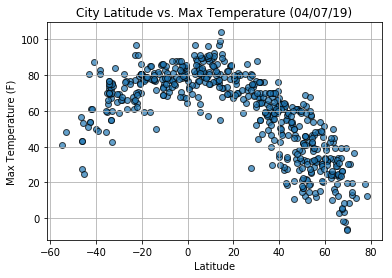

In [66]:
# building a scatter plot for latitude vs temperature

plt.scatter(latitude, 
            max_temperature,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.70, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("lat_max_temperature.png")

# Show plot
plt.show()

Latitude versus Humididty

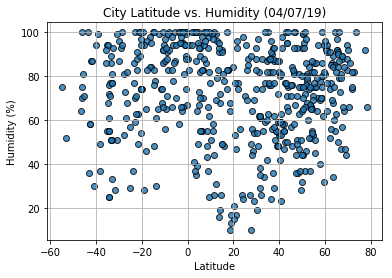

In [70]:
#crafting a new scatter plot that show the difference of humidity and latitude

plt.scatter(latitude, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_Humidity.png")

# Show plot
plt.show()


Latitude versus Cloudiness

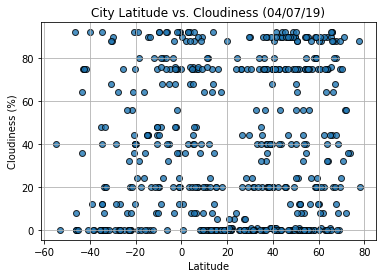

In [68]:
#this time we'll build a scatter plo to see the difference of lattide vs cloudiness
plt.scatter(latitude, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_versus_Cloudliness.png")

# Show plot
plt.show()

Latitude vs Wind Speed

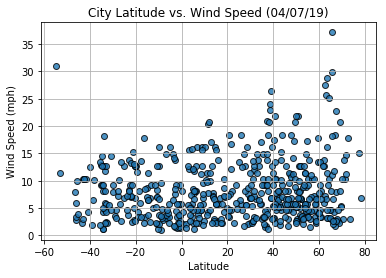

In [69]:
#building a scatter plot to show the effect of Latittude and wind
plt.scatter(latitude, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_against_windspeed.png")

# Show plot
plt.show()
